In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Open Dataset

In [2]:
df = pd.read_json(r"C:\Users\User\Documents\DATA ANALYST LEARN\PYTHON\Personal Project Python\Spotify Project Python\clean_data.json")
df

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,offline,offline_timestamp,incognito_mode
0,2021-09-04T10:12:23Z,Windows 10 (10.0.22000; x64; AppX),7130,LK,Broke In A Minute,Tory Lanez,The New Toronto 3,spotify:track:4xqIYGwwZTEem9U8A42SPF,playbtn,endplay,False,False,1630750333278,False
1,2021-09-04T10:16:20Z,Windows 10 (10.0.22000; x64; AppX),237714,LK,Bonnona,DJ JNK,Bonnona,spotify:track:6ahGShWSkIHVoBd278gYnC,clickrow,trackdone,False,False,1630750341690,False
2,2021-09-04T10:17:08Z,Windows 10 (10.0.22000; x64; AppX),47045,LK,Broken People (Originally Performed by Logic &...,Covered Up,"Chart Backing Tracks 2017, Vol. 14",spotify:track:0MONybFd78nzNA7Au93yb2,trackdone,endplay,False,False,1630750578721,False
3,2021-09-04T10:19:41Z,Windows 10 (10.0.22000; x64; AppX),32500,LK,ブルーバード,Ikimonogakari,Chou Ikimonobakari Tennen Kinen Members Best S...,spotify:track:2XpV9sHBexcNrz0Gyf3l18,clickrow,endplay,False,False,1630750627276,False
4,2021-09-04T10:22:57Z,Windows 10 (10.0.22000; x64; AppX),197298,LK,The Bones - with Hozier,Maren Morris,The Bones,spotify:track:1yTTMcUhL7rtz08Dsgb7Qb,clickrow,trackdone,False,False,1630750779709,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39810,2024-01-15T16:46:58Z,ios,184889,LK,Heading Home,Alan Walker,Heading Home,spotify:track:22O2Zdfj3jnJZDSzlDMAJp,trackdone,trackdone,True,False,1705337034,False
39811,2024-01-15T16:51:28Z,ios,268717,LK,Dandelions - slowed + reverb,Ruth B.,Dandelions,spotify:track:6fhG2KJgwO7CrNflRaRmvp,trackdone,trackdone,True,False,1705337219,False
39812,2024-01-15T16:54:36Z,ios,187541,LK,WAP (feat. Megan Thee Stallion),Cardi B,WAP (feat. Megan Thee Stallion),spotify:track:4Oun2ylbjFKMPTiaSbbCih,trackdone,trackdone,True,False,1705337488,False
39813,2024-01-15T16:59:11Z,ios,274560,LK,春夏秋冬,sumika,Chime,spotify:track:3TQKZoYr4tH2YeJ02bcw1m,trackdone,trackdone,True,False,1705337676,False


# Checking Dataset

In [3]:
df.isnull().sum()

ts                                   0
platform                             0
ms_played                            0
conn_country                         0
master_metadata_track_name           0
master_metadata_album_artist_name    0
master_metadata_album_album_name     0
spotify_track_uri                    0
reason_start                         0
reason_end                           0
shuffle                              0
offline                              0
offline_timestamp                    0
incognito_mode                       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39815 entries, 0 to 39814
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ts                                 39815 non-null  object
 1   platform                           39815 non-null  object
 2   ms_played                          39815 non-null  int64 
 3   conn_country                       39815 non-null  object
 4   master_metadata_track_name         39815 non-null  object
 5   master_metadata_album_artist_name  39815 non-null  object
 6   master_metadata_album_album_name   39815 non-null  object
 7   spotify_track_uri                  39815 non-null  object
 8   reason_start                       39815 non-null  object
 9   reason_end                         39815 non-null  object
 10  shuffle                            39815 non-null  bool  
 11  offline                            39815 non-null  bool  
 12  offline_t

In [5]:
df.nunique()

ts                                   38623
platform                                26
ms_played                            13133
conn_country                             4
master_metadata_track_name            5992
master_metadata_album_artist_name     2784
master_metadata_album_album_name      4986
spotify_track_uri                     6750
reason_start                             9
reason_end                              10
shuffle                                  2
offline                                  2
offline_timestamp                    39294
incognito_mode                           2
dtype: int64

# Data Cleaning

In [6]:
# Change timestamp into date time

df['timestamp'] = pd.to_datetime(df['ts'])

In [7]:
# Split timestamp into year,month, time

df['timestamp_year'] = df['timestamp'].dt.year
df['timestamp_month'] = df['timestamp'].dt.month
df['timestamp_time'] = df['timestamp'].dt.time

In [8]:
# Change the type of "timstamp_time" into str type, in order to split into hours, minutes and second

df['timestamp_time'] = df['timestamp_time'].astype(str)

In [9]:
df[['hours', 'minutes', 'second']] = df['timestamp_time'].str.split(':', n=2, expand = True)

In [10]:
# Drop unuseful columns

df.drop(columns = ['ts','offline_timestamp','incognito_mode','minutes','second'])

,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,offline,timestamp,timestamp_year,timestamp_month,timestamp_time,hours
0,Windows 10 (10.0.22000; x64; AppX),7130,LK,Broke In A Minute,Tory Lanez,The New Toronto 3,spotify:track:4xqIYGwwZTEem9U8A42SPF,playbtn,endplay,False,False,2021-09-04 10:12:23+00:00,2021,9,10:12:23,10
1,Windows 10 (10.0.22000; x64; AppX),237714,LK,Bonnona,DJ JNK,Bonnona,spotify:track:6ahGShWSkIHVoBd278gYnC,clickrow,trackdone,False,False,2021-09-04 10:16:20+00:00,2021,9,10:16:20,10
2,Windows 10 (10.0.22000; x64; AppX),47045,LK,Broken People (Originally Performed by Logic &...,Covered Up,"Chart Backing Tracks 2017, Vol. 14",spotify:track:0MONybFd78nzNA7Au93yb2,trackdone,endplay,False,False,2021-09-04 10:17:08+00:00,2021,9,10:17:08,10
3,Windows 10 (10.0.22000; x64; AppX),32500,LK,ブルーバード,Ikimonogakari,Chou Ikimonobakari Tennen Kinen Members Best S...,spotify:track:2XpV9sHBexcNrz0Gyf3l18,clickrow,endplay,False,False,2021-09-04 10:19:41+00:00,2021,9,10:19:41,10
4,Windows 10 (10.0.22000; x64; AppX),197298,LK,The Bones - with Hozier,Maren Morris,The Bones,spotify:track:1yTTMcUhL7rtz08Dsgb7Qb,clickrow,trackdone,False,False,2021-09-04 10:22:57+00:00,2021,9,10:22:57,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39810,ios,184889,LK,Heading Home,Alan Walker,Heading Home,spotify:track:22O2Zdfj3jnJZDSzlDMAJp,trackdone,trackdone,True,False,2024-01-15 16:46:58+00:00,2024,1,16:46:58,16
39811,ios,268717,LK,Dandelions - slowed + reverb,Ruth B.,Dandelions,spotify:track:6fhG2KJgwO7CrNflRaRmvp,trackdone,trackdone,True,False,2024-01-15 16:51:28+00:00,2024,1,16:51:28,16
39812,ios,187541,LK,WAP (feat. Megan Thee Stallion),Cardi B,WAP (feat. Megan Thee Stallion),spotify:track:4Oun2ylbjFKMPTiaSbbCih,trackdone,trackdone,True,False,2024-01-15 16:54:36+00:00,2024,1,16:54:36,16
39813,ios,274560,LK,春夏秋冬,sumika,Chime,spotify:track:3TQKZoYr4tH2YeJ02bcw1m,trackdone,trackdone,True,False,2024-01-15 16:59:11+00:00,2024,1,16:59:11,16


# Data Exploration

### Platform User Using the Most

In [11]:
# Groupby 'platform' column and sum it
# Reset index into original index
# Sort values from highest to lowest

In [12]:
df['count'] = 1
df2 = df.groupby(['platform'])['count'].sum().reset_index()[['platform','count']]
df2.sort_values(['count'], ascending = False)

,platform,count
22,ios,9923
21,"iOS 16.0 (iPhone14,2)",5740
23,osx,3640
11,"iOS 15.0 (iPhone9,1)",2622
20,"iOS 15.4.1 (iPhone14,2)",2515
13,"iOS 15.0.2 (iPhone9,1)",2269
15,"iOS 15.1 (iPhone12,1)",2268
16,"iOS 15.2 (iPhone12,1)",2242
19,"iOS 15.3.1 (iPhone14,2)",2071
18,"iOS 15.3 (iPhone14,2)",1648


#### Visualization of Platform Uses Most

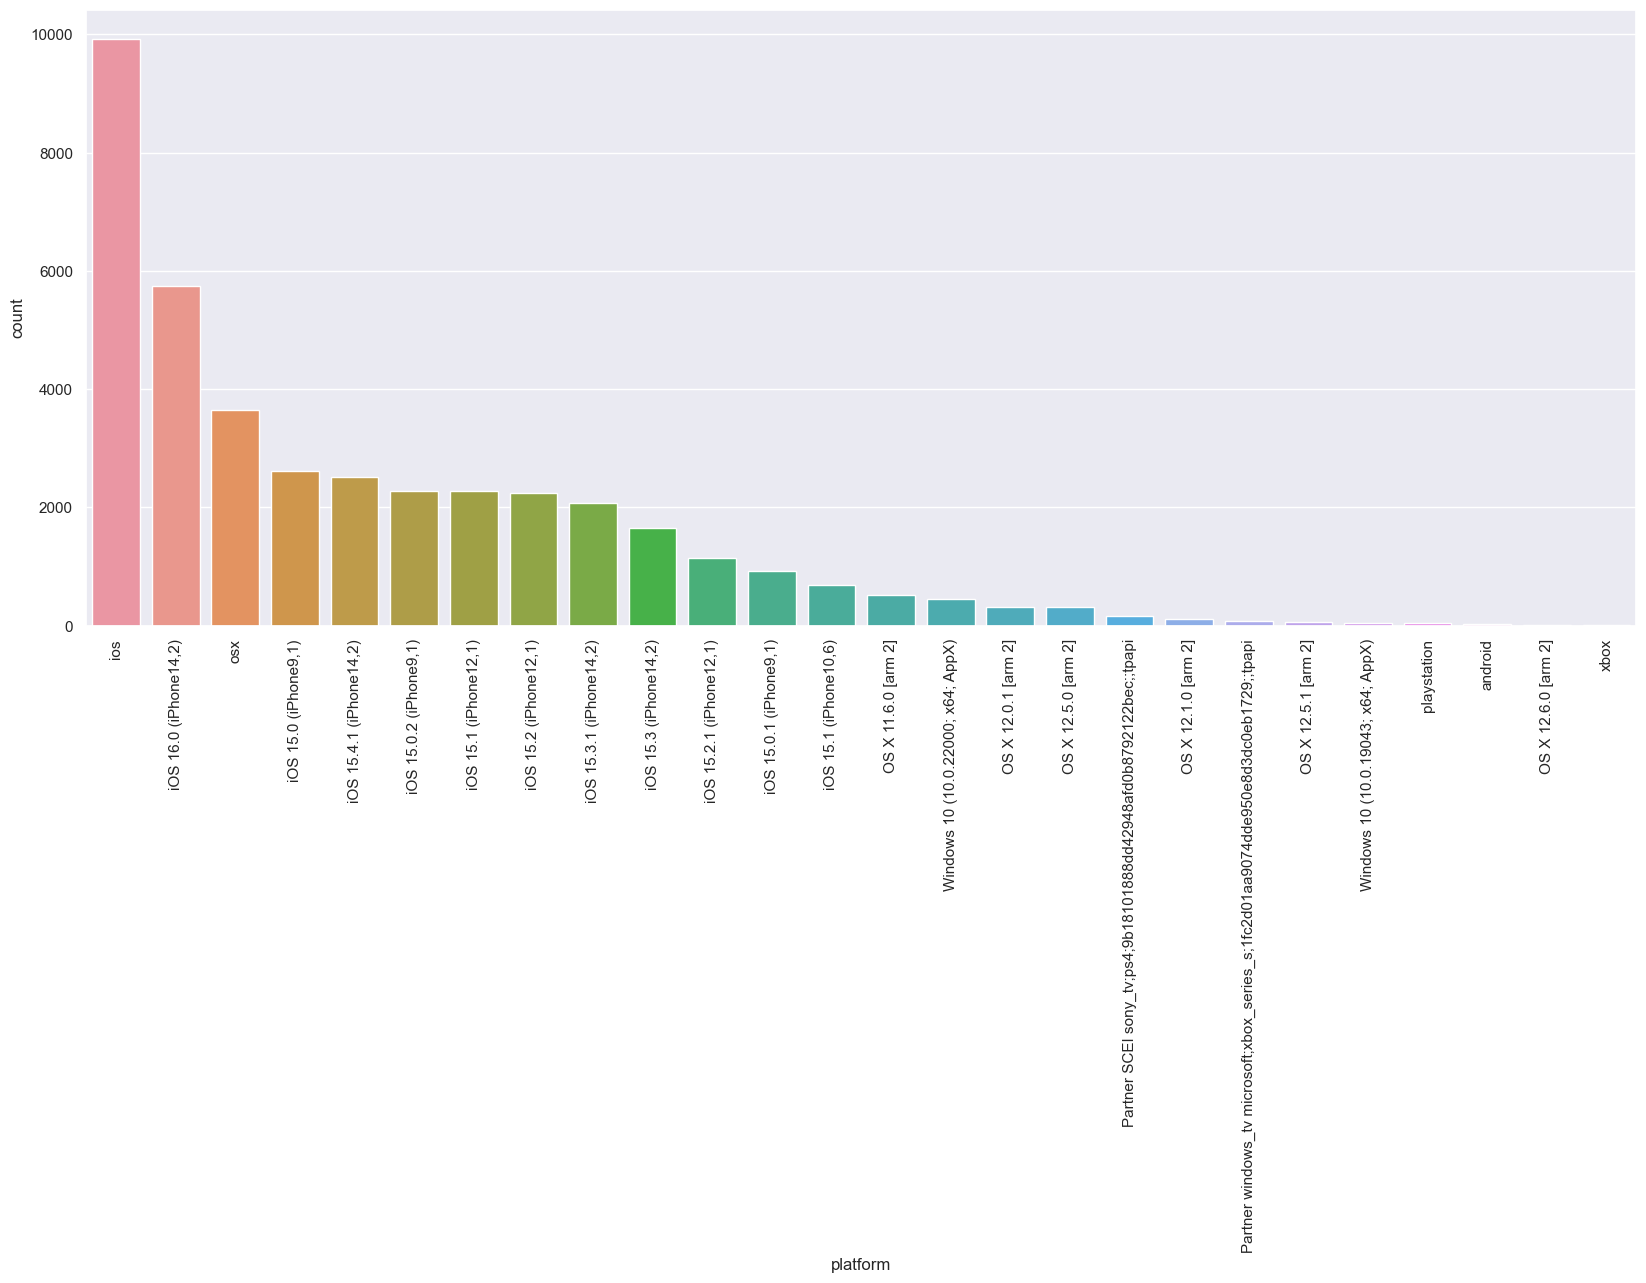

In [14]:
sns1 = sns.barplot(x='platform', y='count', data=df2,order=df2.sort_values(['count'], ascending = False).platform)
sns1.set_xticklabels(sns1.get_xticklabels(), rotation=90)
sns.set(rc={'figure.figsize':(20,8)})

### The Most Songs Listened Based on Highest Played Duration

In [15]:
# Group by 'master_metadata_track_name' column to get the unique values
# Sum the 'ms_played' column to get the sum of duration
# Sort 'ms_played' values from highest to lowest 
# Use 'head(5)' to get the top 5 of songs with the highest duration played

In [16]:
dff = df.groupby(['master_metadata_track_name'])['ms_played'].sum().sort_values(ascending=False).head(5).reset_index()[['master_metadata_track_name','ms_played']]

# Change the 'ms_played' to date time type and convert it into 'hours,minutes,second'
# Drop the 'ms_played' column
dff['durations'] = pd.to_datetime(dff['ms_played'], unit='ms').dt.time 
dff.drop(columns = 'ms_played')

,master_metadata_track_name,durations
0,Off The Grid,04:54:02.803000
1,Beautiful,04:28:33.220000
2,Gammane,04:22:54.216000
3,Heartless,03:59:05.470000
4,Bonnona,03:54:10.520000


### Artist With the Most Streaming

In [17]:
# Count the 'master_metadata_album_artist_name' value 
# Sort the value highest to lowest
# Using 'head(5)' in order to get the 5 higest artist 

In [18]:
dff2 = df['master_metadata_album_artist_name'].value_counts().head(5)
dff2.sort_values(ascending=False)

print("Top 5 of Artist:\n", dff2)

Top 5 of Artist:
 master_metadata_album_artist_name
Juice WRLD    754
Costa         667
Drake         506
Daddy         455
Pop Smoke     397
Name: count, dtype: int64


#### Visualization of Top 5 Artist

<Axes: title={'center': 'Artist With the Most Streaming'}, xlabel='Artist', ylabel='Count of Listened'>

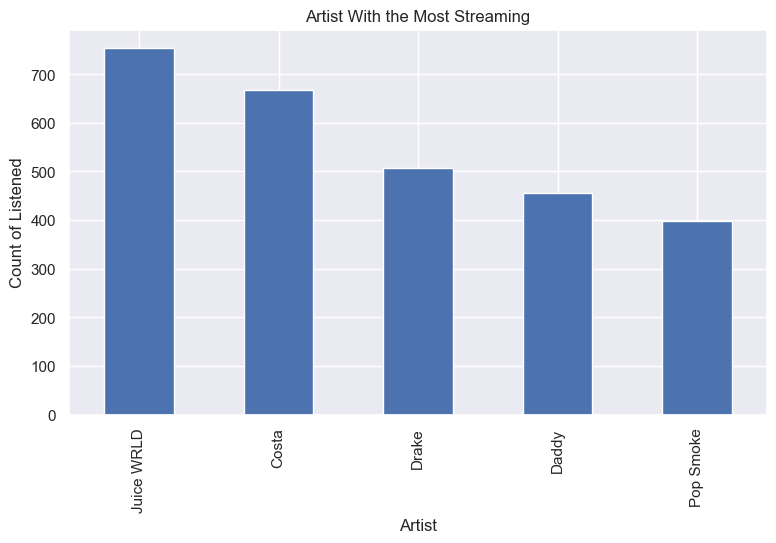

In [19]:
dff2.plot(kind = 'bar', title = 'Artist With the Most Streaming', xlabel = 'Artist', 
          ylabel = 'Count of Listened', figsize = (9,5))

### The Most Populer Album Each Year Based on Duration Played

In [20]:
# Group by 'timestamp_year' column to get unique value
# Sum by 'ms_played' and 'master_metadata_album_album_name' columns 

In [21]:
yearalbum = df.groupby(['timestamp_year'])[['ms_played','master_metadata_album_album_name']].sum().reset_index()[['timestamp_year','master_metadata_album_album_name','ms_played']]
yearalbum

,timestamp_year,master_metadata_album_album_name,ms_played
0,2021,The New Toronto 3BonnonaChart Backing Tracks 2...,2004229108
1,2022,THE GOATEverybodybeerbongs & bentleysbeerbongs...,2905624947
2,2023,Aashiqui 2Chill Level : Anirudh RavichanderOve...,1592541179
3,2024,LOVELY BASTARDSLottery PickSingular Act IICert...,60422187


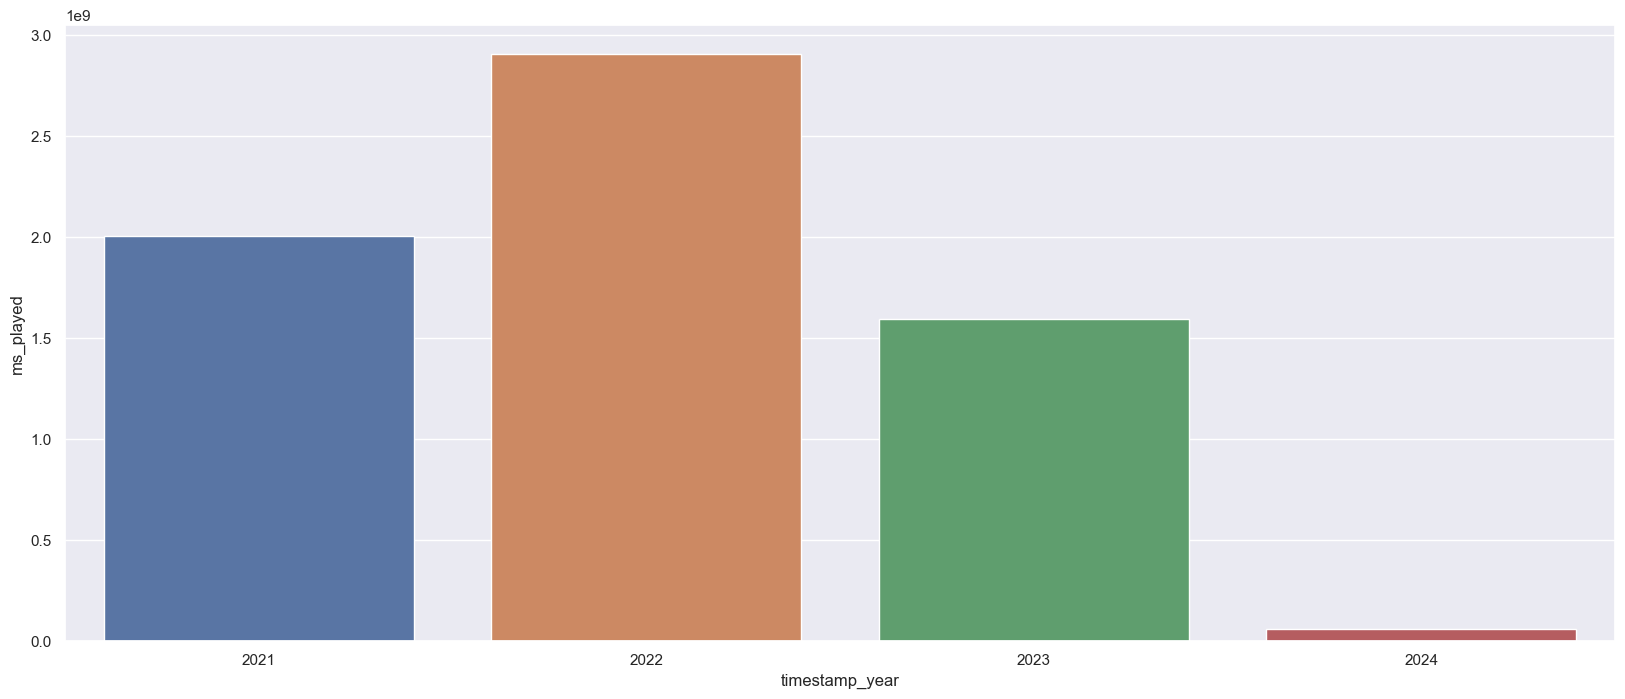

In [22]:
sns2 = sns.barplot(x='timestamp_year', y='ms_played', data=yearalbum)
sns.set(rc={'figure.figsize':(20,8)})

### What time is music played most on spotify?

In [23]:
#Groupby 'hours' column and sum the count in order to know the highest listend 

In [24]:
df['count'] = 1
timeplaymusic = df.groupby(['hours'])['count'].sum().reset_index()[['hours','count']]
timeplaymusic.sort_values(['count'], ascending = False)

,hours,count
21,21,2754
20,20,2596
22,22,2490
19,19,2405
18,18,2145
23,23,1947
17,17,1892
12,12,1876
11,11,1811
13,13,1770


#### Visualization of Most Time Listened

<Axes: xlabel='hours', ylabel='count'>

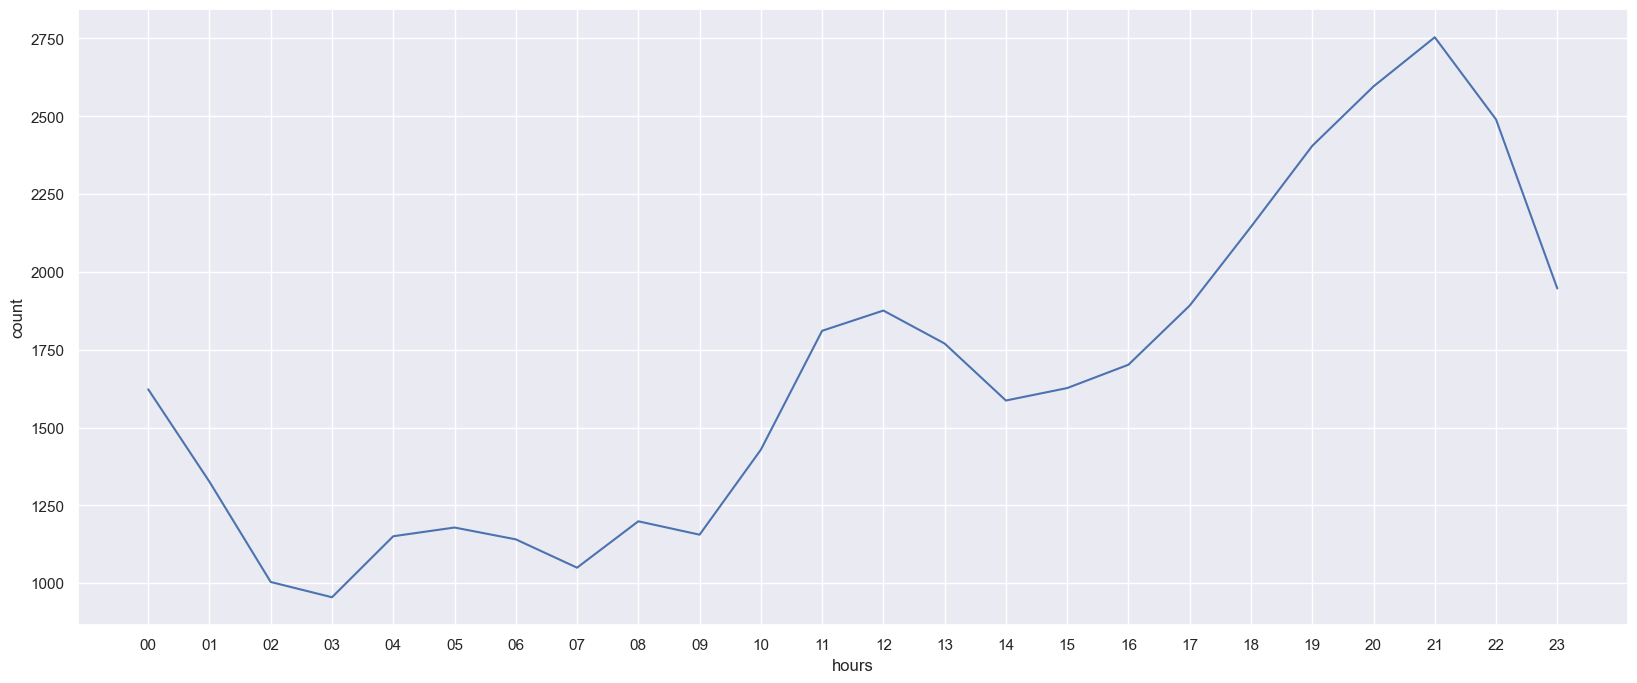

In [25]:
sns.lineplot(x='hours', y='count', data = timeplaymusic)